In [1]:
import numpy as np
import pandas as pd
import keras
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [2]:
samples = 20000
df = pd.read_csv("train.csv")
df = df.loc[:samples,:]
num_classes = len(df["landmark_id"].unique())
num_data = len(df)

In [3]:
print("Size of training data:", df.shape)
print("Number of unique classes:", num_classes)

Size of training data: (20001, 3)
Number of unique classes: 16342


In [4]:
data = pd.DataFrame(df['landmark_id'].value_counts())
#index the data frame
data.reset_index(inplace=True) 
data.columns=['landmark_id','count']

print(data.head(10))
print(data.tail(10))

   landmark_id  count
0       138982     57
1       177870     22
2        62798     20
3       192931     16
4        83144     14
5       171772     14
6       176528     14
7        45428     11
8        84689     10
9       164773     10
       landmark_id  count
16332       147159      1
16333        20310      1
16334        80664      1
16335       149246      1
16336       162189      1
16337        61959      1
16338       194142      1
16339       171822      1
16340        55962      1
16341         4406      1


count    16342.000000
mean         1.223902
std          0.825061
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         57.000000
Name: count, dtype: float64


Text(0, 0.5, 'Occurences')

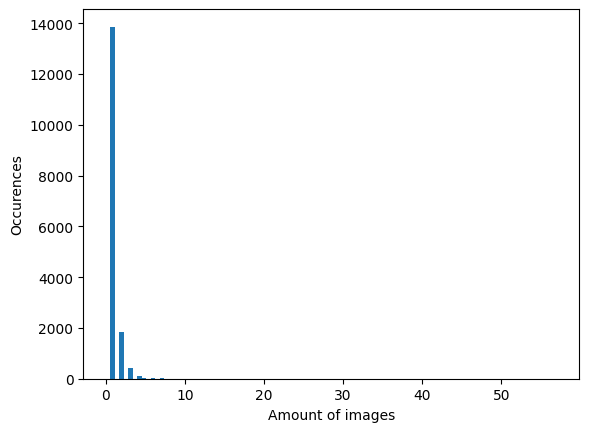

In [8]:
print(data['count'].describe())#statistical data for the distribution
plt.hist(data['count'],100,range = (0,57),label = 'test')#Histogram of the distribution
plt.xlabel("Amount of images")
plt.ylabel("Occurences")

Amount of classes with five and less datapoints: 16281
Amount of classes with with between five and 10 datapoints: 92


Text(0, 0.5, 'Number of images')

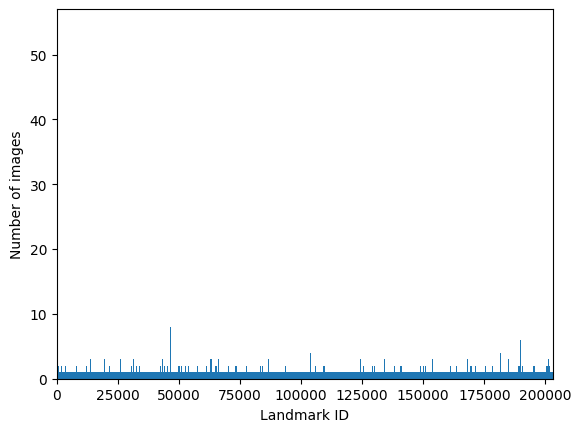

In [16]:
print("Amount of classes with five and less datapoints:", (data['count'].between(0,5)).sum()) 

print("Amount of classes with with between five and 10 datapoints:", (data['count'].between(5,10)).sum())

# Sort the unique values of landmark_id
sorted_bins = sorted(df["landmark_id"].unique())
n = plt.hist(df["landmark_id"],bins=sorted_bins)
freq_info = n[0]

plt.xlim(0,data['landmark_id'].max())
plt.ylim(0,data['count'].max())
plt.xlabel('Landmark ID')
plt.ylabel('Number of images')

4 sample images from random classes:
Contents of base_path: ['d']
Contents of d_directory: ['0', '1', '2', '3', '4', '5', '6']
4 sample images from random classes:
Contents of class_directory: ['cd10026dce7a37ee.jpg', 'cd10028f19871f0f.jpg', 'cd100818a2789cfe.jpg', 'cd10099406400010.jpg', 'cd100d90e2a245b2.jpg', 'cd100ec59b762cbc.jpg', 'cd1011e7c39e2a51.jpg', 'cd10190cd1df1d24.jpg', 'cd10192878f32336.jpg', 'cd101c46e65dcff0.jpg', 'cd101f33af3d6032.jpg', 'cd1020c6e01e6c92.jpg', 'cd1024614ecf3af0.jpg', 'cd1024855520e977.jpg', 'cd102c2d88232edb.jpg', 'cd102f39ddabd4a1.jpg', 'cd10388a173caf9f.jpg', 'cd1038cddc5b91ba.jpg', 'cd103a1788412a21.jpg', 'cd103b1dd1fe37de.jpg', 'cd10454b6fc39ef9.jpg', 'cd104791e9981a3e.jpg', 'cd1047c5270dfeda.jpg', 'cd104c9f9a3a389a.jpg', 'cd10562050fc4bb0.jpg', 'cd10567b7ca7b0c7.jpg', 'cd105c336f16daf1.jpg', 'cd105de184bd9d26.jpg', 'cd105ec89e9dbe0d.jpg', 'cd105fa42829b7d9.jpg', 'cd107066f39287fb.jpg', 'cd107bc6d8a24019.jpg', 'cd107f75726b01b7.jpg', 'cd10866bd9133

<Figure size 1600x1600 with 0 Axes>

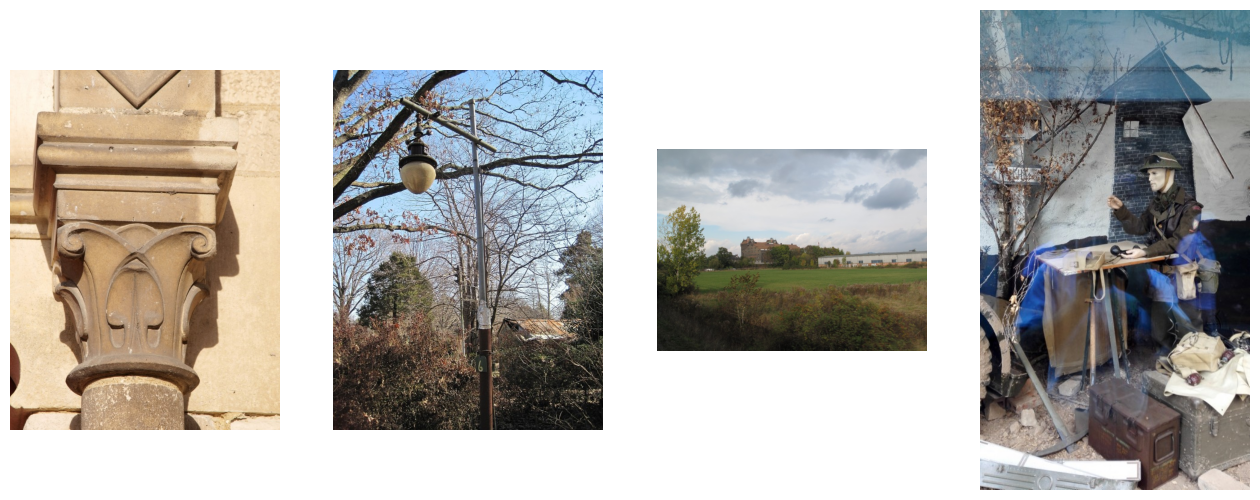

In [37]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
lencoder.fit(df["landmark_id"])
base_path = r"E:\AI and ML\Landmark Detection\images"

def encode_label(lbl):
    return lencoder.transform(lbl)
    
def decode_label(lbl):
    return lencoder.inverse_transform(lbl)
    
def get_image_from_number(num):
    fname, label = df.loc[num,:]
    fname = fname + ".jpg"
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    path = os.path.join(f1,f2,f3,fname)
    im = cv2.imread(os.path.join(base_path,path))
    return im, label

print("4 sample images from random classes:")
fig=plt.figure(figsize=(16, 16))
# for i in range(1,5):
#     a = random.choices(os.listdir(base_path), k=3)
#     folder = os.path.join(base_path, *a)
#     # folder = base_path+'/'+a[0]+'/'+a[1]+'/'+a[2]
#     random_img = random.choice(os.listdir(folder))
#     img = np.array(Image.open(os.path.join(folder, random_img)))
#     fig.add_subplot(1, 4, i)
#     plt.imshow(img)
#     plt.axis('off')

# plt.show()


print("Contents of base_path:", os.listdir(base_path))

d_directory = os.path.join(base_path, 'd')
print("Contents of d_directory:", os.listdir(d_directory))  # Debugging statement

print("4 sample images from random classes:")
fig = plt.figure(figsize=(16, 16))
for i in range(1, 5):
    # Select a random class (subdirectory from 'd')
    class_folder = random.choice(os.listdir(d_directory))
    class_directory = os.path.join(d_directory, class_folder)
    print("Contents of class_directory:", os.listdir(class_directory))  # Debugging statement

    try:
        # Select a random image from the class directory
        random_img = random.choice(os.listdir(class_directory))
        img = np.array(Image.open(os.path.join(class_directory, random_img)))
        fig.add_subplot(1, 4, i)
        plt.imshow(img)
        plt.axis('off')
    except FileNotFoundError:
        print("Folder does not exist:", class_directory)
    except Exception as e:
        print("Error:", e)

plt.show()

In [38]:
from keras.applications import VGG19
from keras.layers import *
from keras import Sequential

### Parameters
# learning_rate   = 0.0001
# decay_speed     = 1e-6
# momentum        = 0.09

# loss_function   = "sparse_categorical_crossentropy"
source_model = VGG19(weights=None)
#new_layer = Dense(num_classes, activation=activations.softmax, name='prediction')
drop_layer = Dropout(0.5)
drop_layer2 = Dropout(0.5)


model = Sequential()
for layer in source_model.layers[:-1]: # go through until last layer
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
#     if layer == source_model.layers[-3]:
#         model.add(drop_layer)
# model.add(drop_layer2)
model.add(Dense(num_classes, activation="softmax"))
model.summary()


opt1 = keras.optimizers.RMSprop(learning_rate = 0.0001, momentum = 0.09)
opt2 = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(optimizer=opt1,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

#sgd = SGD(lr=learning_rate, decay=decay_speed, momentum=momentum, nesterov=True)
# rms = keras.optimizers.RMSprop(lr=learning_rate, momentum=momentum)
# model.compile(optimizer=rms,
#               loss=loss_function,
#               metrics=["accuracy"])
# print("Model compiled! \n")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 224, 224, 3)       12        
 chNormalization)                                                
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                      

In [ ]:
### Function used for processing the data, fitted into a data generator.
def get_image_from_number(num, df):
    fname = df.iloc[num, 0]
    label = df.iloc[num, 1]
    fname = fname + ".jpg"
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    path = os.path.join(f1,f2,f3,fname)
    im = cv2.imread(os.path.join(base_path,path))
    return im, label

def image_reshape(im, target_size):
    return cv2.resize(im, target_size)
    
def get_batch(dataframe,start, batch_size):
    image_array = []
    label_array = []
    
    end_img = start+batch_size
    if end_img > len(dataframe):
        end_img = len(dataframe)

    for idx in range(start, end_img):
        n = idx
        im, label = get_image_from_number(n, dataframe)
        im = image_reshape(im, (224, 224)) / 255.0
        image_array.append(im)
        label_array.append(label)
        
    label_array = encode_label(label_array)
    return np.array(image_array), np.array(label_array)
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 15

# Split train data up into 80% and 20% validation
train, validate = np.split(df.sample(frac=1), [int(.8*len(df))])
print("Training on:", len(train), "samples")
print("Validation on:", len(validate), "samples")

    
for e in range(epochs):
    print("Epoch: ", str(e+1) + "/" + str(epochs))
    if epoch_shuffle:
        train = train.sample(frac = 1)
    for it in range(int(np.ceil(len(train)/batch_size))):

        X_train, y_train = get_batch(train, it*batch_size, batch_size)

        model.train_on_batch(X_train, y_train)
        

model.save("Model.h5")

In [ ]:
### Test on training set
batch_size = 16

errors = 0
good_preds = []
bad_preds = []

for it in range(int(np.ceil(len(validate)/batch_size))):

    X_train, y_train = get_batch(validate, it*batch_size, batch_size)

    result = model.predict(X_train)
    cla = np.argmax(result, axis=1)
    for idx, res in enumerate(result):
        print("Class:", cla[idx], "- Confidence:", np.round(res[cla[idx]],2), "- GT:", y_train[idx])
        if cla[idx] != y_train[idx]:
            errors = errors + 1
            bad_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])
        else:
            good_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])

print("Errors: ", errors, "Acc:", np.round(100*(len(validate)-errors)/len(validate),2))

#Good predictions
good_preds = np.array(good_preds)
good_preds = np.array(sorted(good_preds, key = lambda x: x[2], reverse=True))

fig=plt.figure(figsize=(16, 16))
for i in range(1,6):
    n = int(good_preds[i,0])
    img, lbl = get_image_from_number(n, validate)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(1, 5, i)
    plt.imshow(img)
    lbl2 = np.array(int(good_preds[i,1])).reshape(1,1)
    sample_cnt = list(df.landmark_id).count(lbl)
    plt.title("Label: " + str(lbl) + "\nClassified as: " + str(decode_label(lbl2)) + "\nSamples in class " + str(lbl) + ": " + str(sample_cnt))
    plt.axis('off')
plt.show()